In [2]:
#Basic and most important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
data.shape

(26707, 34)

In [5]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

<Axes: xlabel='sex', ylabel='count'>

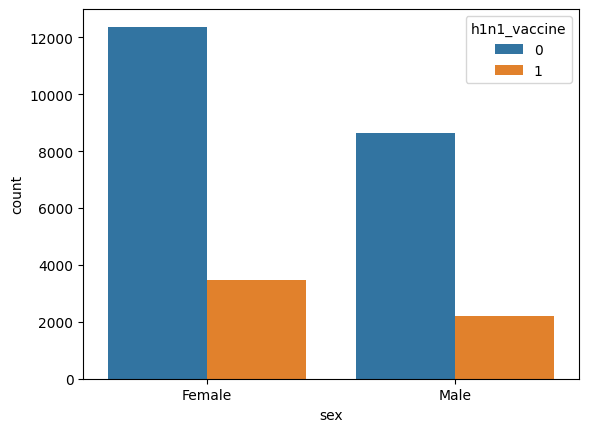

In [6]:
sns.countplot(x="sex",hue="h1n1_vaccine",data=data)

In [7]:
correlation_mat=data.corr()

<Axes: >

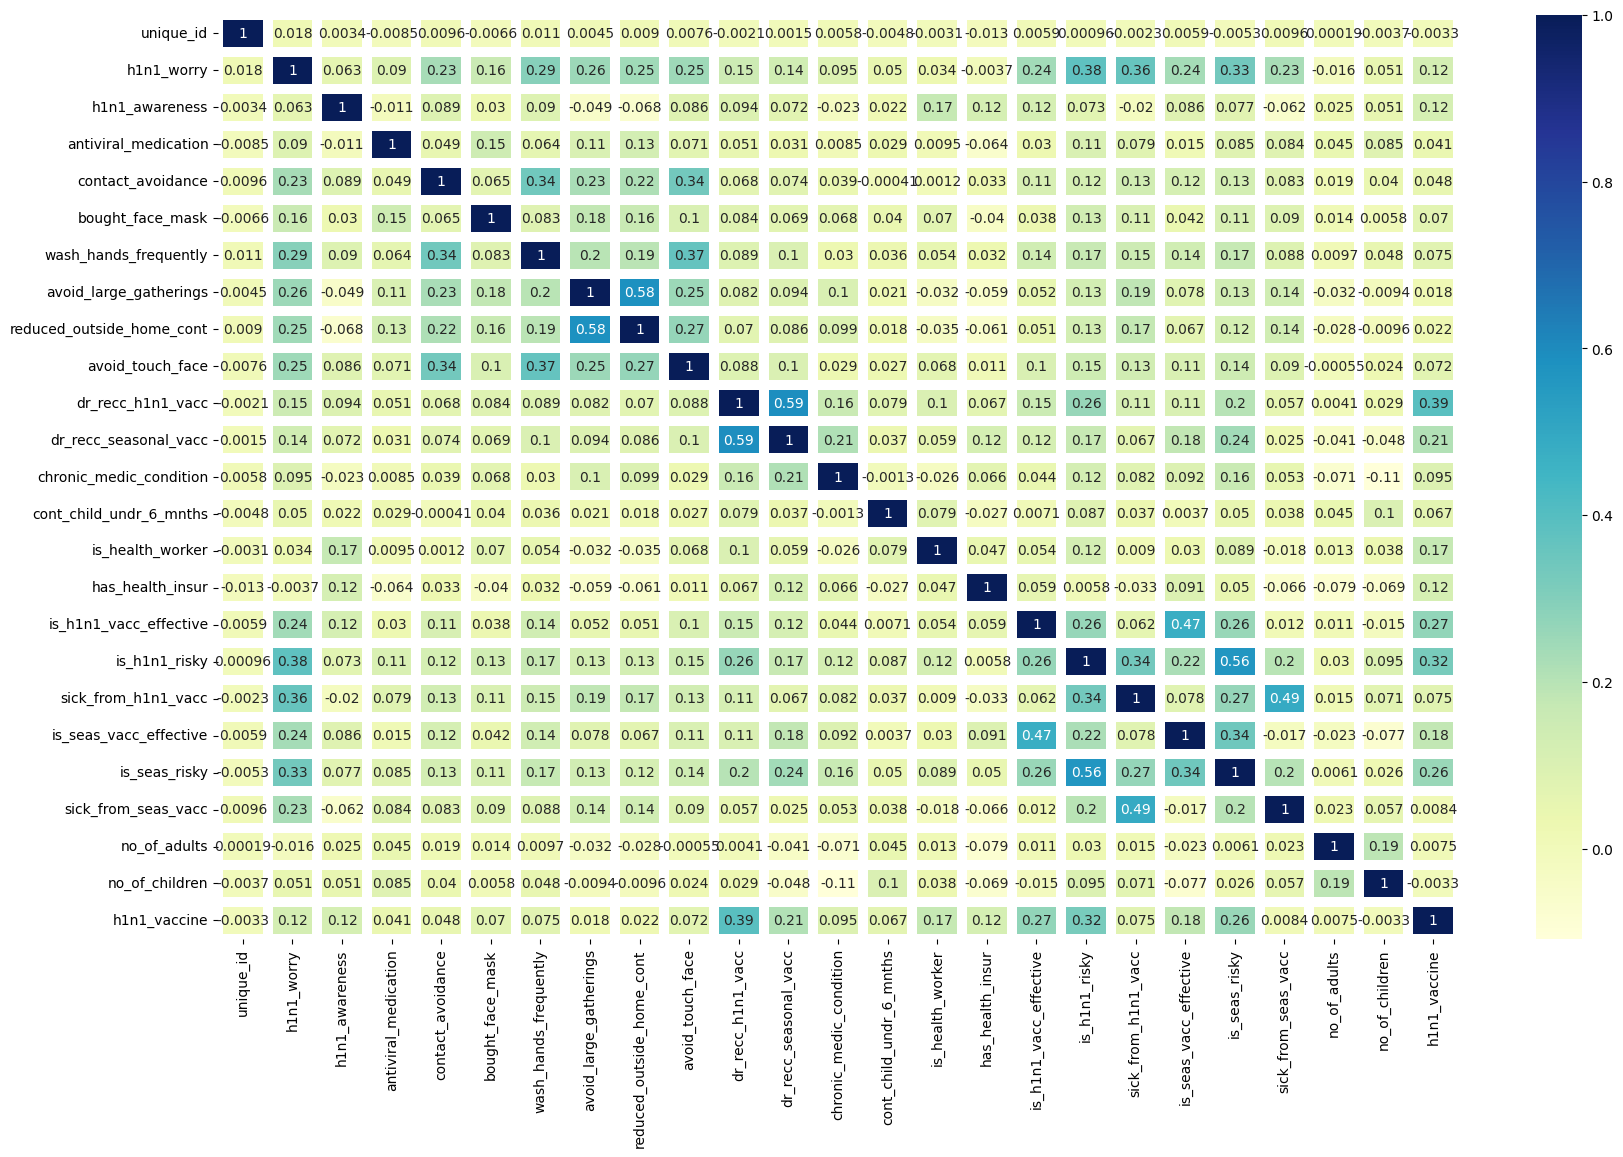

In [8]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation_mat,annot=True,linewidths=6,cmap="YlGnBu")

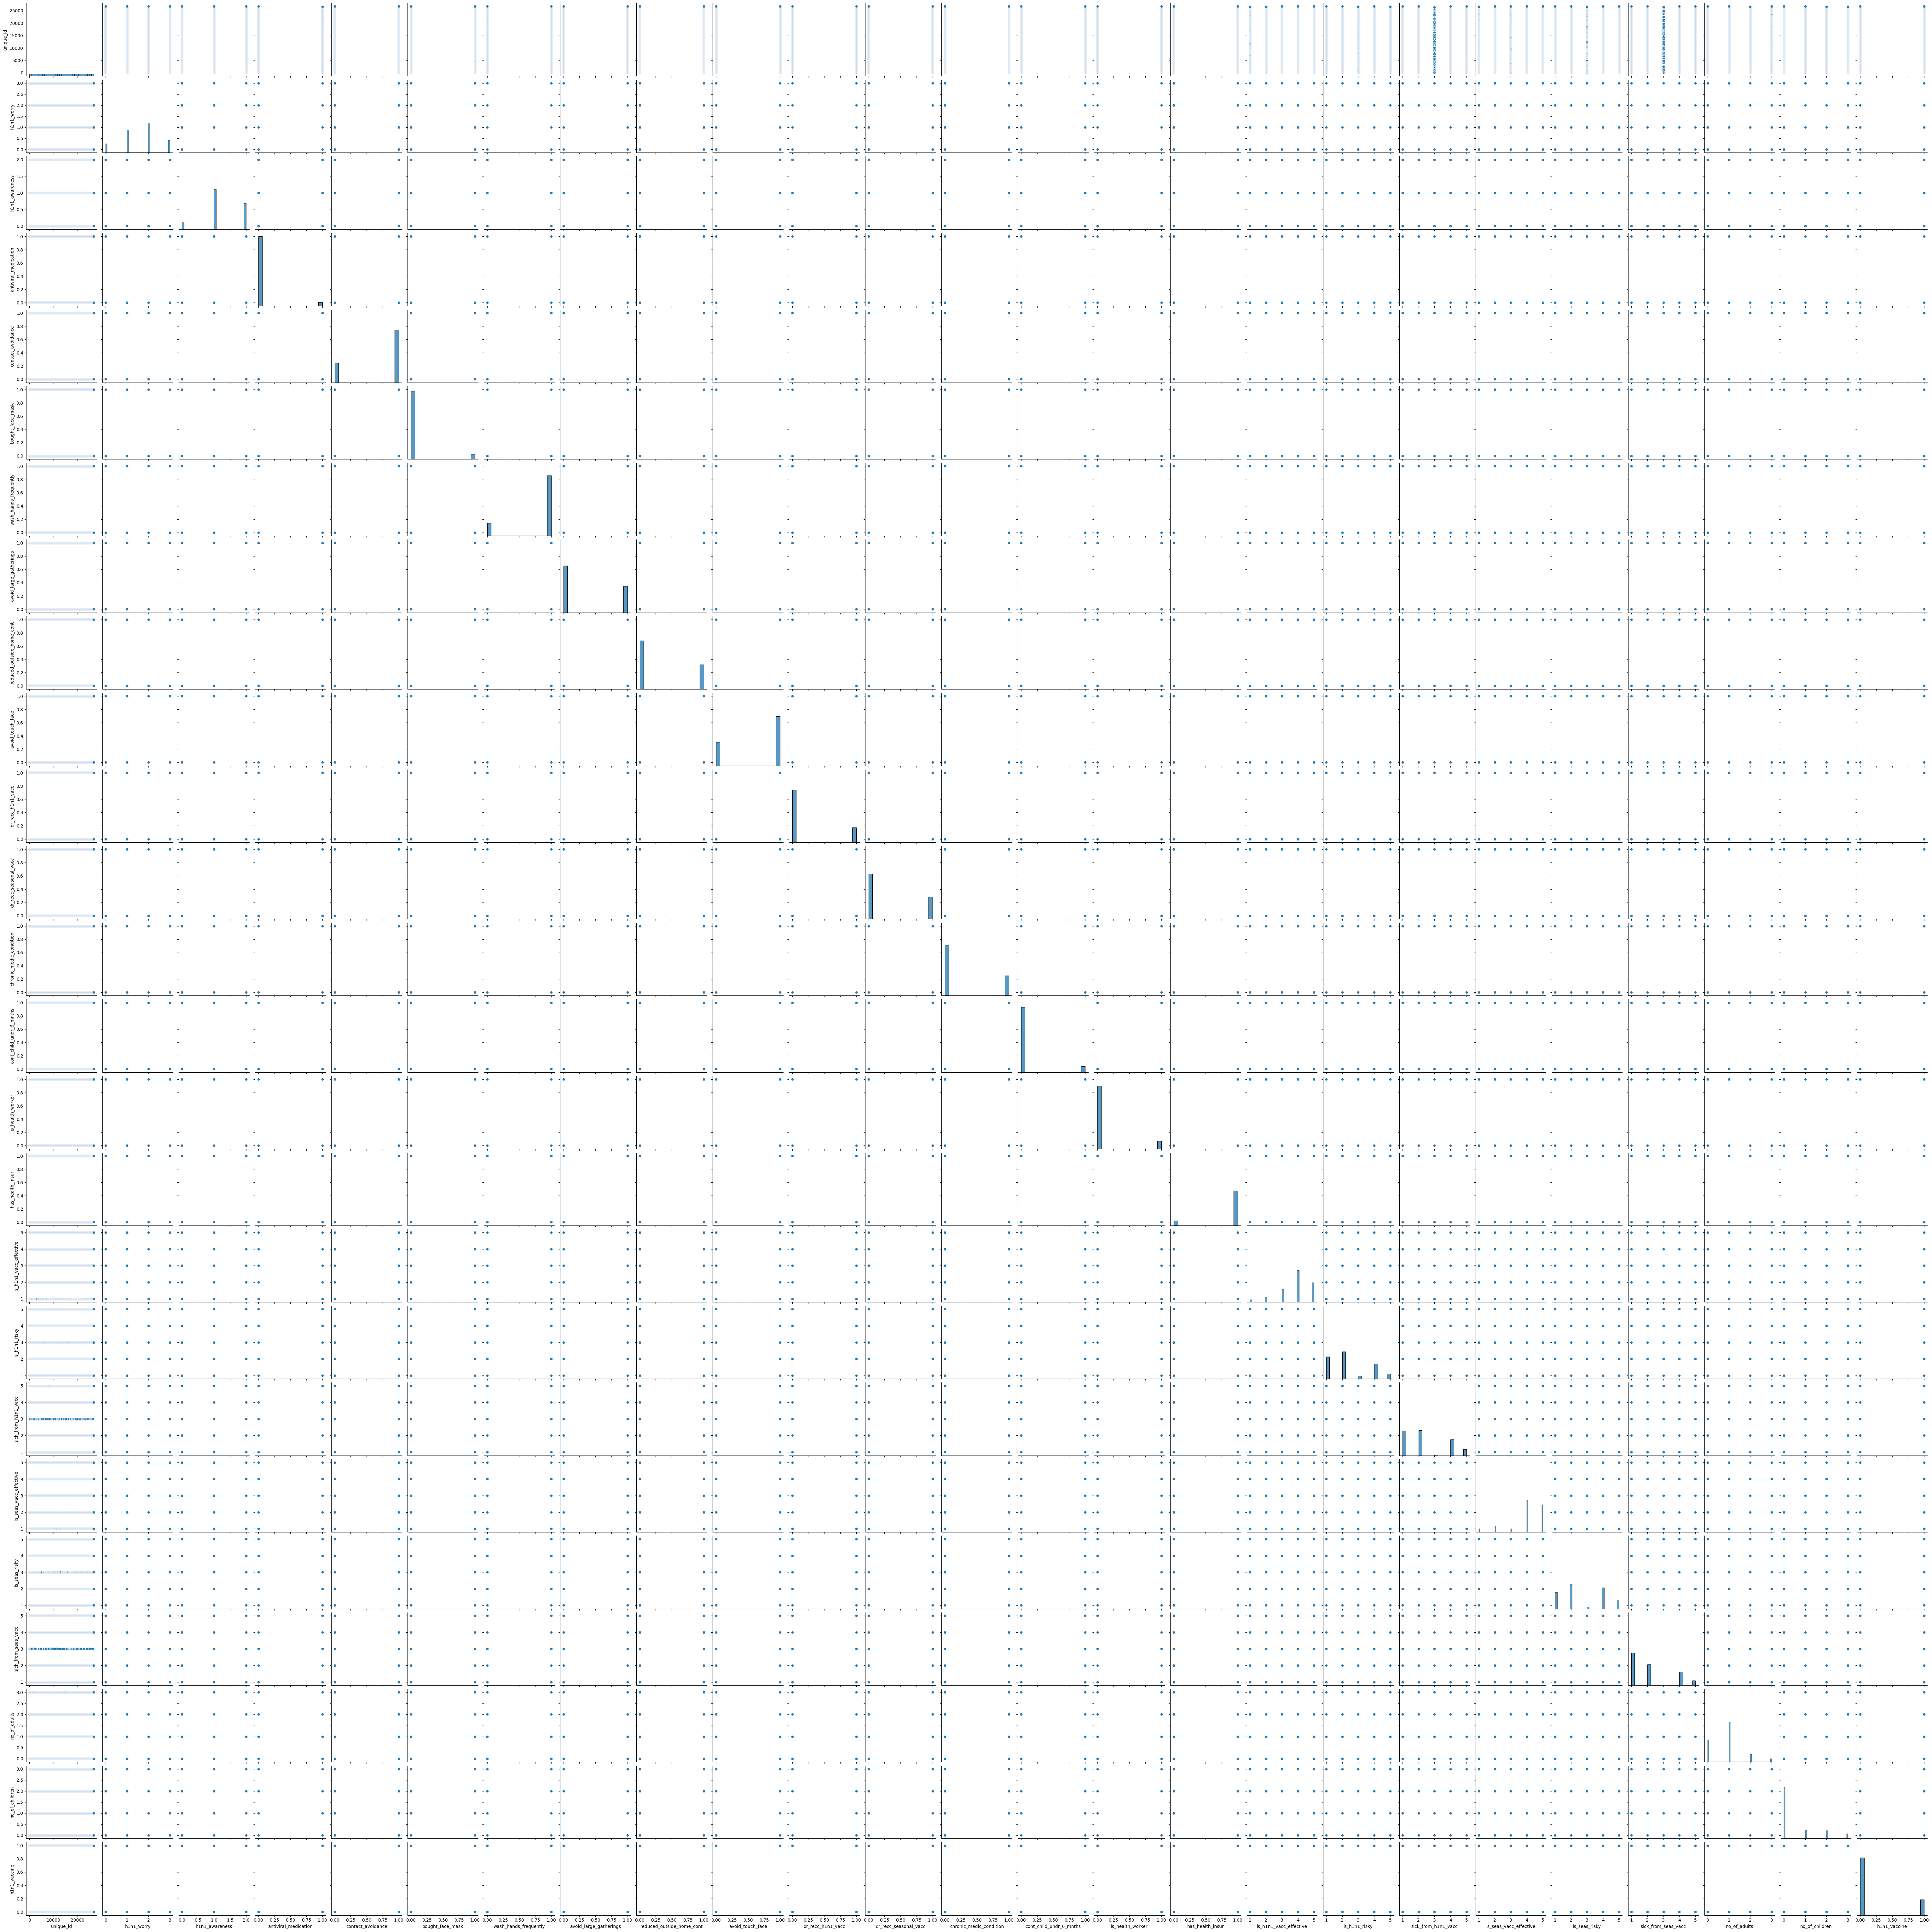

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
data.drop

<Axes: >

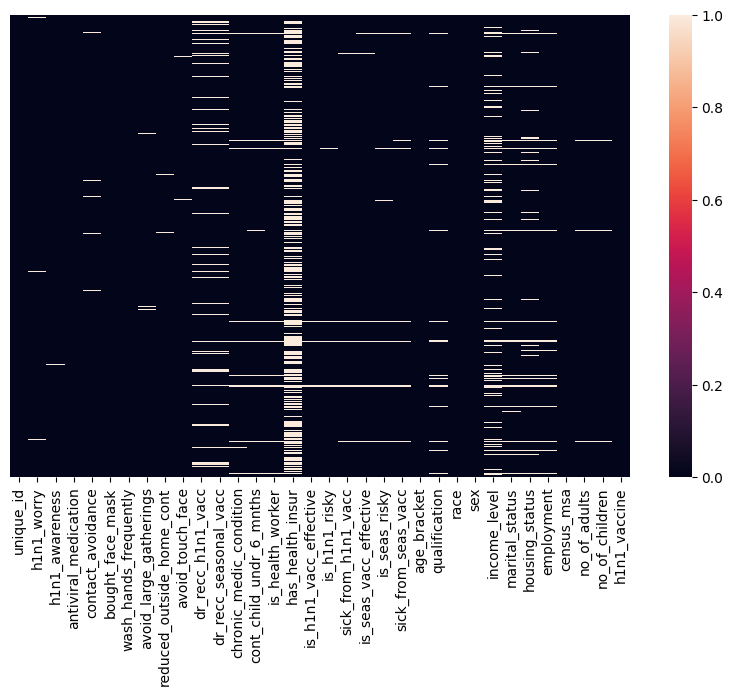

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

In [ ]:
print(data["unique_id"].value_counts())
print(data["h1n1_worry"].value_counts())
print(data["h1n1_awareness"].value_counts())
print(data["antiviral_medication"].value_counts())
print(data["contact_avoidance"].value_counts())
print(data["bought_face_mask"].value_counts())
print(data["wash_hands_frequently"].value_counts())
print(data["avoid_large_gatherings"].value_counts())
print(data["reduced_outside_home_cont"].value_counts())
print(data["avoid_touch_face"].value_counts())
print(data["dr_recc_h1n1_vacc"].value_counts())
print(data["dr_recc_seasonal_vacc"].value_counts())
print(data["chronic_medic_condition"].value_counts())
print(data["cont_child_undr_6_mnths"].value_counts())
print(data["is_health_worker"].value_counts())
print(data["has_health_insur"].value_counts())
print(data["is_h1n1_vacc_effective"].value_counts())
print(data["is_h1n1_risky"].value_counts())
print(data["sick_from_h1n1_vacc"].value_counts())
print(data["is_seas_vacc_effective"].value_counts())
print(data["is_seas_risky"].value_counts())
print(data["sick_from_seas_vacc"].value_counts())
print(data["age_bracket"].value_counts())
print(data["qualification"].value_counts())
print(data["race"].value_counts())
print(data["sex"].value_counts())
print(data["income_level"].value_counts())
print(data["marital_status"].value_counts())
print(data["housing_status"].value_counts())
print(data["employment"].value_counts())
print(data["census_msa"].value_counts())
print(data["no_of_adults"].value_counts())
print(data["no_of_children"].value_counts())

0        1
17736    1
17812    1
17811    1
17810    1
        ..
8898     1
8897     1
8896     1
8895     1
26706    1
Name: unique_id, Length: 26707, dtype: int64
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64
1.0    14598
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64
0.0    25335
1.0     1301
Name: antiviral_medication, dtype: int64
1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64
0.0    24847
1.0     1841
Name: bought_face_mask, dtype: int64
1.0    22015
0.0     4650
Name: wash_hands_frequently, dtype: int64
0.0    17073
1.0     9547
Name: avoid_large_gatherings, dtype: int64
0.0    17644
1.0     8981
Name: reduced_outside_home_cont, dtype: int64
1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64
0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64
0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64
0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64
0.0    23

In [ ]:
data = data.drop('has_health_insur', axis=1)
data = data.drop('income_level', axis=1)
data = data.drop('housing_status', axis=1)
data = data.drop('marital_status', axis=1)
data = data.drop('employment', axis=1)
data = data.drop('dr_recc_seasonal_vacc', axis=1)
data = data.drop('dr_recc_h1n1_vacc', axis=1)
data = data.drop('qualification', axis=1)

In [ ]:
data.isnull().sum()

unique_id                      0
h1n1_worry                    92
h1n1_awareness               116
antiviral_medication          71
contact_avoidance            208
bought_face_mask              19
wash_hands_frequently         42
avoid_large_gatherings        87
reduced_outside_home_cont     82
avoid_touch_face             128
chronic_medic_condition      971
cont_child_undr_6_mnths      820
is_health_worker             804
is_h1n1_vacc_effective       391
is_h1n1_risky                388
sick_from_h1n1_vacc          395
is_seas_vacc_effective       462
is_seas_risky                514
sick_from_seas_vacc          537
age_bracket                    0
race                           0
sex                            0
census_msa                     0
no_of_adults                 249
no_of_children               249
h1n1_vaccine                   0
dtype: int64

In [ ]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
race                          object
sex                           object
census_msa                    object
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

In [ ]:
data["h1n1_worry"].fillna(data["h1n1_worry"].median(),inplace=True)
data["h1n1_awareness"].fillna(data["h1n1_awareness"].median(),inplace=True)
data["antiviral_medication"].fillna(data["antiviral_medication"].median(),inplace=True)
data["contact_avoidance"].fillna(data["contact_avoidance"].median(),inplace=True)
data["bought_face_mask"].fillna(data["bought_face_mask"].median(),inplace=True)
data["wash_hands_frequently"].fillna(data["wash_hands_frequently"].median(),inplace=True)
data["avoid_large_gatherings"].fillna(data["avoid_large_gatherings"].median(),inplace=True)
data["reduced_outside_home_cont"].fillna(data["reduced_outside_home_cont"].median(),inplace=True)
data["avoid_touch_face"].fillna(data["avoid_touch_face"].median(),inplace=True)
data["chronic_medic_condition"].fillna(data["chronic_medic_condition"].median(),inplace=True)
data["cont_child_undr_6_mnths"].fillna(data["cont_child_undr_6_mnths"].median(),inplace=True)
data["is_health_worker"].fillna(data["is_health_worker"].median(),inplace=True)
data["is_h1n1_vacc_effective"].fillna(data["is_h1n1_vacc_effective"].median(),inplace=True)
data["is_h1n1_risky"].fillna(data["is_h1n1_risky"].median(),inplace=True)
data["sick_from_h1n1_vacc"].fillna(data["sick_from_h1n1_vacc"].median(),inplace=True)
data["is_seas_vacc_effective"].fillna(data["is_seas_vacc_effective"].median(),inplace=True)
data["is_seas_risky"].fillna(data["is_seas_risky"].median(),inplace=True)
data["sick_from_seas_vacc"].fillna(data["sick_from_seas_vacc"].median(),inplace=True)
data["no_of_adults"].fillna(data["no_of_adults"].median(),inplace=True)
data["no_of_children"].fillna(data["no_of_children"].median(),inplace=True)

In [ ]:
data.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
race                         0
sex                          0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [ ]:
data["h1n1_worry"]=le.fit_transform(data["h1n1_worry"])
data["h1n1_awareness"]=le.fit_transform(data["h1n1_awareness"])
data["antiviral_medication"]=le.fit_transform(data["antiviral_medication"])
data["contact_avoidance"]=le.fit_transform(data["contact_avoidance"])
data["bought_face_mask"]=le.fit_transform(data["bought_face_mask"])
data["wash_hands_frequently"]=le.fit_transform(data["wash_hands_frequently"])
data["avoid_large_gatherings"]=le.fit_transform(data["avoid_large_gatherings"])
data["reduced_outside_home_cont"]=le.fit_transform(data["reduced_outside_home_cont"])
data["avoid_touch_face"]=le.fit_transform(data["avoid_touch_face"])
data["chronic_medic_condition"]=le.fit_transform(data["chronic_medic_condition"])
data["cont_child_undr_6_mnths"]=le.fit_transform(data["cont_child_undr_6_mnths"])
data["is_health_worker"]=le.fit_transform(data["is_health_worker"])
data["is_h1n1_vacc_effective"]=le.fit_transform(data["is_h1n1_vacc_effective"])
data["is_h1n1_risky"]=le.fit_transform(data["is_h1n1_risky"])
data["sick_from_h1n1_vacc"]=le.fit_transform(data["sick_from_h1n1_vacc"])
data["is_seas_vacc_effective"]=le.fit_transform(data["is_seas_vacc_effective"])
data["is_seas_risky"]=le.fit_transform(data["is_seas_risky"])
data["sick_from_seas_vacc"]=le.fit_transform(data["sick_from_seas_vacc"])
data["no_of_adults"]=le.fit_transform(data["no_of_adults"])
data["no_of_children"]=le.fit_transform(data["no_of_children"])

data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,race,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1,0,0,0,0,0,0,1,1,...,1,0,1,55 - 64 Years,White,Female,Non-MSA,0,0,0
1,1,3,2,0,1,0,1,0,1,1,...,3,1,3,35 - 44 Years,White,Male,"MSA, Not Principle City",0,0,0
2,2,1,1,0,1,0,0,0,0,0,...,3,0,1,18 - 34 Years,White,Male,"MSA, Not Principle City",2,0,0
3,3,1,1,0,1,0,1,1,0,0,...,4,3,0,65+ Years,White,Female,"MSA, Principle City",0,0,0
4,4,2,1,0,1,0,1,1,0,1,...,2,0,3,45 - 54 Years,White,Female,"MSA, Not Principle City",1,0,0


In [ ]:
# Dividing data into Input X variable and Target Y variable
X=data.drop(["h1n1_vaccine","age_bracket","race","sex","census_msa"],axis=1)
y=data["h1n1_vaccine"]

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#####LINEAR REGRESSION

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_train,y_train)

0.16863737864076833

In [ ]:
#####LOGISTIC REGRESSION

In [ ]:
model_1=LogisticRegression(solver="liblinear")

In [ ]:
model_1.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
model_1.score(X_train,y_train)

0.7877928747191613

In [ ]:
model_1.score(X_test,y_test)

0.7836016473231

In [ ]:
#####DECISION TREE MODEL

In [ ]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree.score(X_train,y_train)

1.0

In [ ]:
dtree.score(X_test,y_test)

0.7239485835517284

In [ ]:
dtreeR= DecisionTreeClassifier(criterion="gini", max_depth=3,random_state=0)
dtreeR.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
dtreeR.score(X_train,y_train)

0.802663956349631

In [ ]:
y_predict= dtreeR.predict(X_test)

In [ ]:
dtreeR.score(X_test, y_test)

0.8048171720953451

<Axes: >

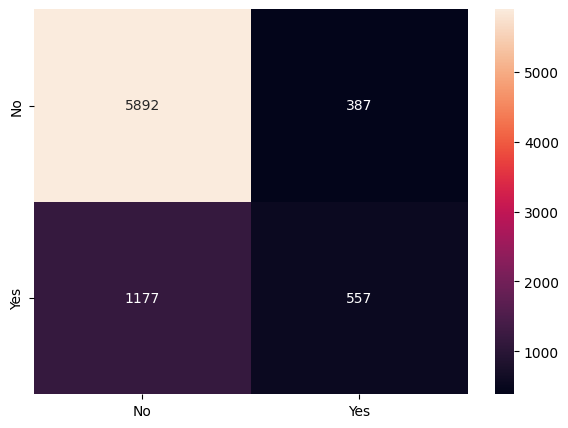

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index= [i for i in ["No","Yes"]],
                    columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot= True, fmt='g')

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=150,base_estimator=dtreeR,random_state=0)
bgcl = bgcl.fit(X_train,y_train)
print(bgcl.score(X_train,y_train))
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))

0.807478335294747
0.799575689504555


<Axes: >

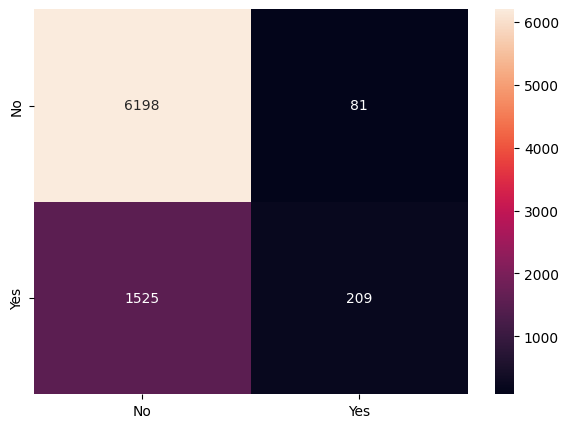

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index= [i for i in ["No","Yes"]],
                    columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot= True, fmt='g')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc1 = AdaBoostClassifier(n_estimators=120, random_state=0)
abc1 = abc1.fit(X_train, y_train)
print(abc1.score(X_train, y_train))
y_predict = abc1.predict(X_test)
print(abc1.score(X_test, y_test))

0.8160372311971755
0.810058654686135


<Axes: >

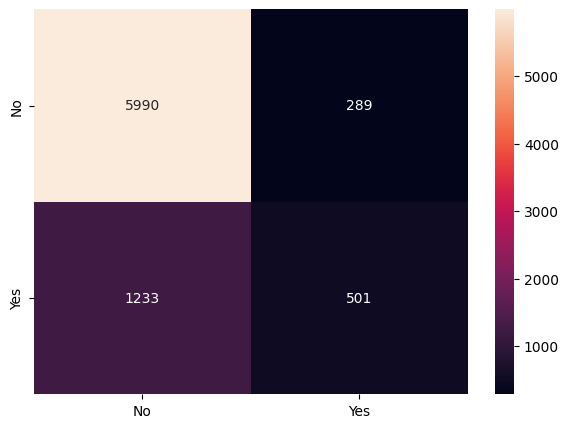

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index= [i for i in ["No","Yes"]],
                    columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot= True, fmt='g')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc1 = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbc1 = gbc1.fit(X_train, y_train)
print(gbc1.score(X_train, y_train))
y_predict = gbc1.predict(X_test)
print(gbc1.score(X_test, y_test))

0.8271637958703327
0.8131785847997005


<Axes: >

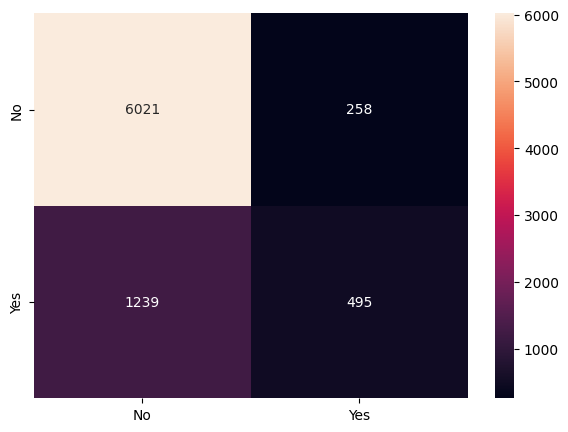

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index= [i for i in ["No","Yes"]],
                    columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot= True, fmt='g')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=3, max_features=3)
rfc1 = rfc1.fit(X_train, y_train)
print(rfc1.score(X_train, y_train))
y_predict = rfc1.predict(X_test)
print(rfc1.score(X_test, y_test))

0.7906280089868407
0.7844752277548983


<Axes: >

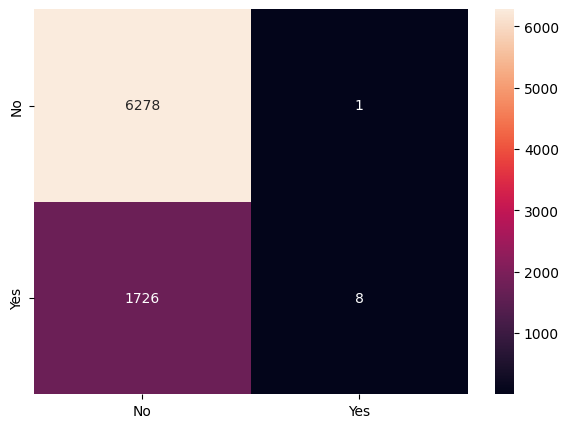

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index= [i for i in ["No","Yes"]],
                    columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot= True, fmt='g')

In [ ]:
from scipy.stats import zscore

In [ ]:
XScaled = X.apply(zscore)#convert all attributes to Z scale
XScaled.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children
count,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,...,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04
mean,3.405454e-17,2.979773e-17,1.572362e-16,-1.862358e-18,-1.117415e-16,-1.596307e-18,1.457960e-16,-1.556399e-17,8.859502e-17,8.753082e-17,...,4.349936e-17,4.283423e-17,9.790681e-17,4.203608e-17,4.842130e-17,1.324935e-16,3.644900e-17,1.696076e-17,7.901718e-17,3.857741e-17
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,...,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.731986e+00,-1.781960e+00,-2.044279e+00,-2.262927e-01,-1.634957e+00,-2.720971e-01,-2.177944e+00,-7.458901e-01,-7.117983e-01,-1.453764e+00,...,-2.949919e-01,-3.489496e-01,-2.852308e+00,-1.047610e+00,-9.993096e-01,-2.808938e+00,-1.240062e+00,-8.455375e-01,-1.183463e+00,-5.723870e-01
25%,-8.659930e-01,-6.818488e-01,-4.236260e-01,-2.262927e-01,-1.634957e+00,-2.720971e-01,4.591486e-01,-7.458901e-01,-7.117983e-01,-1.453764e+00,...,-2.949919e-01,-3.489496e-01,-8.526601e-01,-1.047610e+00,-9.993096e-01,-2.370822e-02,-5.128897e-01,-8.455375e-01,-1.183463e+00,-5.723870e-01
50%,0.000000e+00,4.182621e-01,-4.236260e-01,-2.262927e-01,6.116368e-01,-2.720971e-01,4.591486e-01,-7.458901e-01,-7.117983e-01,6.878696e-01,...,-2.949919e-01,-3.489496e-01,1.471640e-01,-2.644026e-01,-2.603827e-01,-2.370822e-02,-5.128897e-01,-8.770912e-02,1.499300e-01,-5.723870e-01
75%,8.659930e-01,4.182621e-01,1.197027e+00,-2.262927e-01,6.116368e-01,-2.720971e-01,4.591486e-01,1.340680e+00,1.404892e+00,6.878696e-01,...,-2.949919e-01,-3.489496e-01,1.146988e+00,1.302012e+00,1.217471e+00,9.047016e-01,9.414549e-01,-8.770912e-02,1.499300e-01,5.084062e-01
max,1.731986e+00,1.518373e+00,1.197027e+00,4.419056e+00,6.116368e-01,3.675158e+00,4.591486e-01,1.340680e+00,1.404892e+00,6.878696e-01,...,3.389923e+00,2.865744e+00,1.146988e+00,2.085220e+00,1.956398e+00,9.047016e-01,1.668627e+00,2.185776e+00,2.816717e+00,2.669993e+00


In [ ]:
NNH = KNeighborsClassifier(n_neighbors= 5, weights = 'distance',metric='euclidean')

In [ ]:
NNH.fit(XScaled,y)

KNeighborsClassifier(metric='euclidean', weights='distance')